In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [2]:
df = pd.read_csv('/content/Egypt_Houses_Price.csv')

In [3]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [5]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [6]:
df = df[df['Bathrooms'] != 'Unknown']
df = df[df['Bedrooms'] != 'Unknown']
df = df[df['Area'] != 'Unknown']
df = df[df['Price'] != 'Unknown']

In [7]:
df['Area'].replace('Unknown', np.nan)
df['Price'].replace('Unknown', np.nan)
df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'].replace('Unknown', np.nan)



0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
27356    2.0
27357    3.0
27358    4.0
27359    4.0
27360    5.0
Name: Bathrooms, Length: 27324, dtype: object

In [8]:
df['Bedrooms'] = df['Bedrooms'].replace('10+', '11')
df['Bathrooms'] = df['Bathrooms'].replace('10+', '11')

In [9]:
df['Area'] = df['Area'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(float)


In [10]:
df['Area']=df['Area'].fillna(df['Area'].mean())
df['Price']=df['Price'].fillna(df['Price'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Bathrooms']=df['Bathrooms'].fillna(df['Bathrooms'].mean())



In [11]:
df.dropna()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.000000,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.000000,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.000000,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.000000,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.000000,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000.0,3.0,2.0,240.000000,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000.0,4.0,3.0,218.000000,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000.0,3.0,4.0,308.000000,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000.0,4.0,4.0,478.000000,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


In [12]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

<ipython-input-13-79c3861c8fef>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

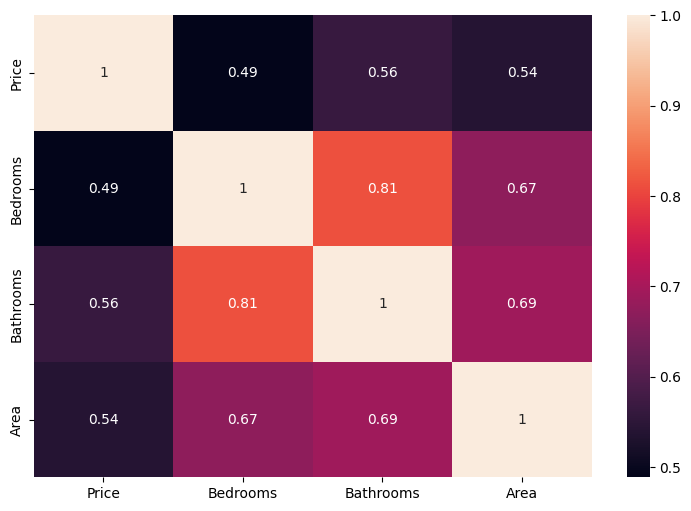

In [13]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)


In [14]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
  if pd.api.types.is_numeric_dtype(df_max_scaled[column]):
      df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

In [15]:
df_max_scaled.cov()

<ipython-input-15-c622307847fe>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_max_scaled.cov()


,Price,Bedrooms,Bathrooms,Area
Price,0.000795,0.001513,0.001954,0.002437
Bedrooms,0.001513,0.012060,0.010951,0.011807
Bathrooms,0.001954,0.010951,0.015072,0.013596
Area,0.002437,0.011807,0.013596,0.025591


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
fit = pca.fit(df.select_dtypes(include='number'))
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.00000000e+00 3.94150296e-10 2.89357386e-14 6.53180875e-15]
[[ 1.00000000e+00  8.72514645e-08  1.12665692e-07  1.27509724e-05]
 [ 1.27516165e-05 -4.36068077e-03 -4.62669163e-03 -9.99979789e-01]
 [-6.09438942e-08  6.75861540e-01  7.37001197e-01 -6.35722218e-03]
 [ 1.29493825e-08  7.37015714e-01 -6.75875602e-01 -8.68240158e-05]]
